In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# read .csv format data
DATA_DIR = '../Data/data_160_ori.csv'

df = pd.read_csv(DATA_DIR)

In [13]:
pep = df['Peptide'].unique().tolist()
solvent = ['MeCN','MeOH','iPrOH','DCM','DCE']

In [14]:
conversion = df['yields'].values

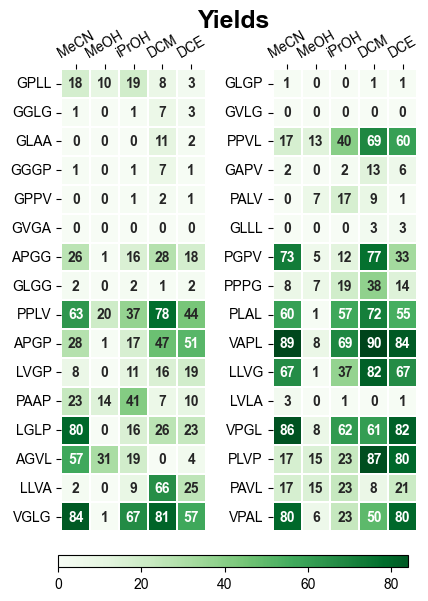

In [15]:
conversion = conversion.reshape(32,5)
conversion = pd.DataFrame(conversion, index=pep, columns=solvent)

conversion1 = conversion.iloc[:16,:].copy().astype(int)
conversion2 = conversion.iloc[16:,:].copy().astype(int)

plt.rcParams['font.family'] = 'Arial'

fig = plt.figure(figsize=(5,6)) # 8,6
axs = fig.subplots(nrows=1, ncols=2)
fig.suptitle('Yields', size = 18, weight = 'bold')

hm1 = sns.heatmap(conversion1,
            cmap ='Greens', # Greens
            center=45, # center of scale bar
            linewidths=0.2,
            cbar = False,
            ax=axs[0],
            square=True,
            annot=True,
            annot_kws={'weight': 'bold',
                        'size':10
                        },
            )


hm2 = sns.heatmap(conversion2,
            cmap ='Greens', # Greens
            center=45, # center of scale bar
            linewidths=0.2,
            cbar = False,
            ax=axs[1],
            square=True,
            annot=True,
            annot_kws={'weight': 'bold',
                       # 'color': 'black',
                        'size':10
                        },
            )

hm1.xaxis.tick_top()
hm2.xaxis.tick_top()
hm1.set_xticklabels(hm1.get_xticklabels(), rotation=30)
hm2.set_xticklabels(hm2.get_xticklabels(), rotation=30)

# Create a color bar for the subplots
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # Adjust the position and size as needed
cbar = fig.colorbar(hm1.collections[0], cax=cbar_ax, orientation='horizontal')

plt.show()

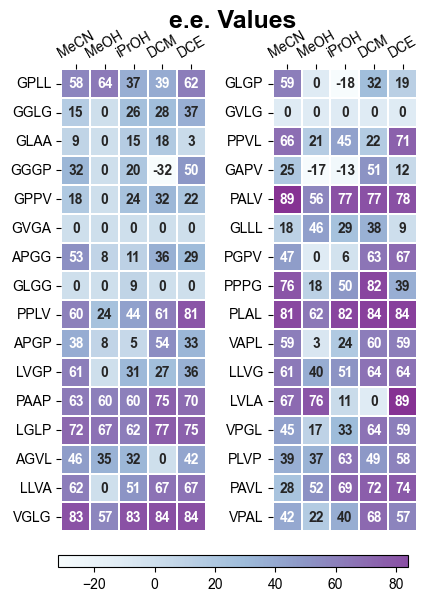

In [16]:
# draw ee values

# read ee data
ee = np.array(df['ee'])
ee = ee.reshape(32,5)
ee = pd.DataFrame(ee, index=pep, columns=solvent)
ee1 = ee.iloc[:16,:].copy().astype(int)
ee2 = ee.iloc[16:,:].copy().astype(int)

plt.rcParams['font.family'] = 'Arial'

fig = plt.figure(figsize=(5,6)) # 8,6
axs = fig.subplots(nrows=1, ncols=2)
fig.suptitle('e.e. Values', size = 18, weight = 'bold')


hm1 = sns.heatmap(ee1,
            cmap ='BuPu',
            center=50, # center of scale bar
            linewidths=0.2,
            cbar = False,
            ax=axs[0],
            square=True,
            annot=True,
            annot_kws={'weight': 'bold',
                        'size':10}
            )

hm2 = sns.heatmap(ee2,
            cmap ='BuPu',
            center=50, # center of scale bar
            linewidths=0.2,
            cbar = False,
            ax=axs[1],
            square=True,
            annot=True,
            annot_kws={'weight': 'bold',
                       # 'color':'white',
                        'size':10}
            )

hm1.xaxis.tick_top()
hm1.set_xticklabels(hm1.get_xticklabels(), rotation=30)
hm2.xaxis.tick_top()
hm2.set_xticklabels(hm2.get_xticklabels(), rotation=30)

# Create a color bar for the subplots
cbar_ax = fig.add_axes([0.15, 0.05, 0.7, 0.02])  # Adjust the position and size as needed
cbar = fig.colorbar(hm1.collections[0], cax=cbar_ax, orientation='horizontal')
# cbar.set_label('Colorbar Label')  # Set label for color bar


plt.show()

# confusion matrix

Text(0.5, 1.0, 'Yields')

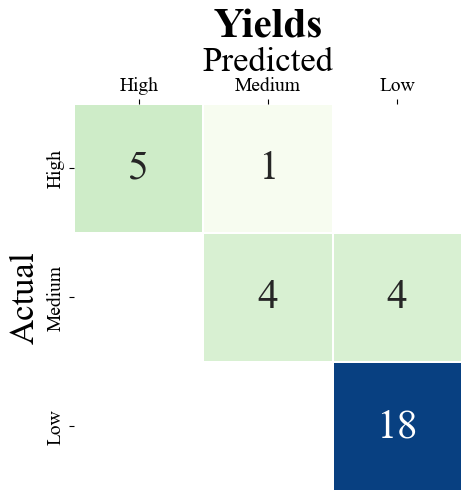

In [4]:

# yields confusion results
cf_ee =  [[ 5, 1,  0],
     [ 0,  4,  4],
     [ 0, 0,  18]]
cf_df = pd.DataFrame(cf_ee, index=['High','Medium','Low'], columns=['High','Medium','Low'])

plt.rcParams['font.family'] = 'Times New Roman' # setting font type    

plt.figure(figsize=(5,6)) # 8,6
# # axs = fig.subplots(nrows=1, ncols=2)
# fig.suptitle('ee Values', size = 18)

hm = sns.heatmap(data=cf_df, 
            cmap ='GnBu', #OrRd
            linewidths=0.3,
            annot=True,
            annot_kws={#'weight': 'bold',
                        'size':30},
            cbar = False,
            square=True,
            mask= cf_df < 1
            )

hm.xaxis.set_label_position('top') 
hm.xaxis.tick_top()
hm.tick_params(labelsize=14)

hm.set_xlabel('Predicted', fontsize=25)
hm.set_ylabel('Actual', fontsize=25)

plt.title('Yields', fontsize=30, weight='bold')


Text(0.5, 1.0, 'e.e. values')

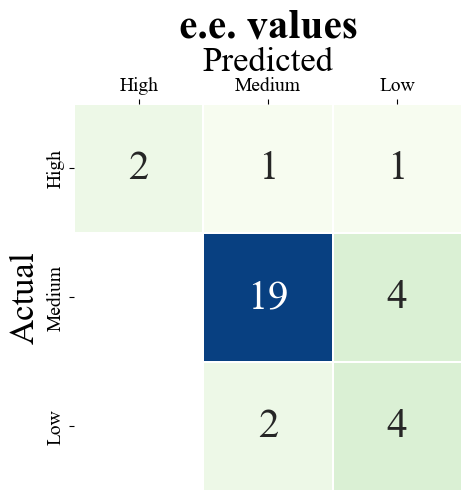

In [5]:
# ee confusion results
cf_ee =  [[ 2,  1,  1],
          [ 0,  19,  4],
          [ 0,  2, 4]]
cf_df = pd.DataFrame(cf_ee, index=['High','Medium','Low'], columns=['High','Medium','Low'])

plt.rcParams['font.family'] = 'Times New Roman' # setting font type    

plt.figure(figsize=(5,6)) # 8,6
# # axs = fig.subplots(nrows=1, ncols=2)
# fig.suptitle('ee Values', size = 18)

hm = sns.heatmap(data=cf_df, 
            cmap ='GnBu', #OrRd
            linewidths=0.3,
            annot=True,
            annot_kws={#'weight': 'bold',
                        'size':30},
            cbar = False,
            square=True,
            mask= cf_df < 1
            )

hm.xaxis.set_label_position('top') 
hm.xaxis.tick_top()
hm.tick_params(labelsize=14)

hm.set_xlabel('Predicted', fontsize=25)
hm.set_ylabel('Actual', fontsize=25)

plt.title('e.e. values', fontsize=30, weight='bold')